In [ ]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob


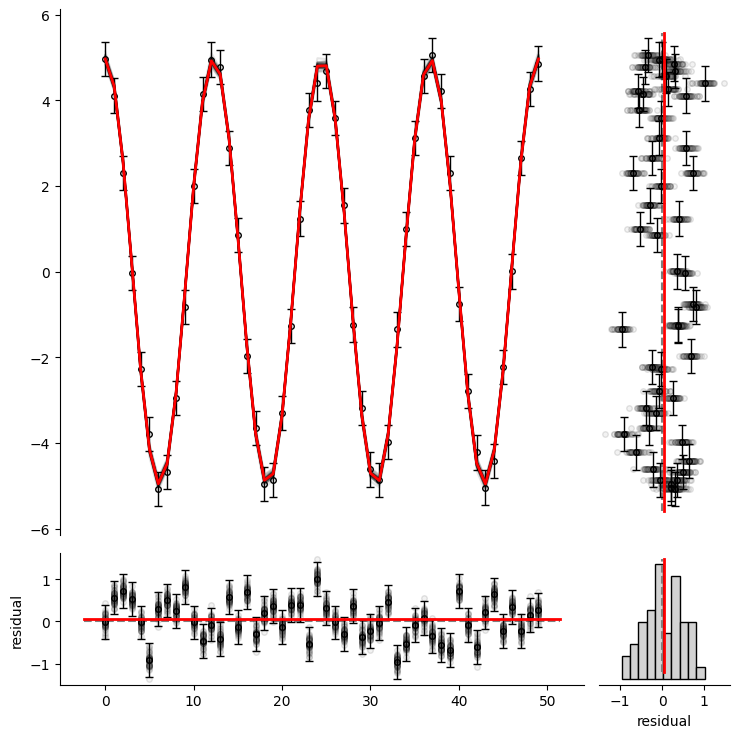

In [2]:
### NOTE: it would likely be better to reformulate this as a fourier transform
# because this regression is not particularly well-behaved. The poor behavior, 
# however, lets us show a "real life" example of setting parameter bounds, etc.

%matplotlib inline
import dataprob
import numpy as np

def periodic(amplitude,phase,freq,theta):
    return amplitude*np.sin(freq*theta + phase)

gen_params = {"amplitude":5,
              "phase":np.pi/2,
              "freq":2}

err = 0.2
num_points = 50

theta = np.linspace(0,4*np.pi,num_points)
y_obs = periodic(theta=theta,**gen_params) + np.random.normal(0,err,num_points)
y_std = err*2

non_fit_kwargs={"theta":theta}

f = dataprob.setup(periodic,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)

# Set the guesses and bounds. Because of the periodicity, this is not
# particularly well behaved. Fix frequency at right value. 
f.param_df.loc["amplitude","guess"] = 1
f.param_df.loc["phase","guess"] = np.pi/2

f.param_df.loc["freq","guess"] = 2.0
f.param_df.loc["freq","fixed"] = True

f.param_df.loc["phase","lower_bound"] = np.pi/2.5
f.param_df.loc["phase","upper_bound"] = np.pi/1.5

f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f)

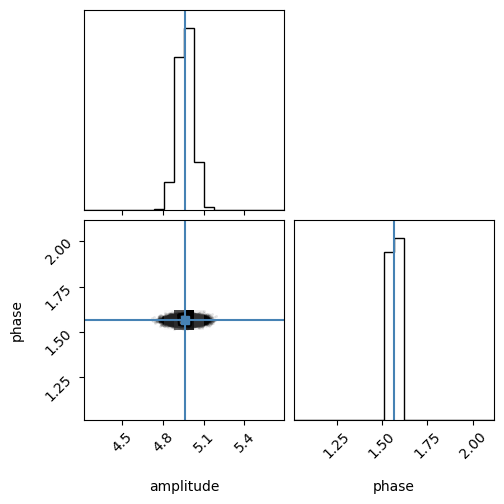

In [5]:
fig = dataprob.plot_corner(f)

In [3]:
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
amplitude,amplitude,4.964253,0.056011,4.851573,5.076933,1.000000,False,-inf,inf,NaN,NaN
phase,phase,1.567128,0.011511,1.543971,1.590285,1.570796,False,1.256637,2.094395,NaN,NaN
freq,freq,2.000000,NaN,NaN,NaN,2.000000,True,-inf,inf,NaN,NaN
